In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [418]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [419]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [420]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411586 entries, 0 to 1411585
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1411586 non-null  int64  
 1   kWh       1411586 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.5 MB


In [421]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1411581    0.13
1411582    0.13
1411583    0.13
1411584    0.13
1411585    0.13
Name: kWh, Length: 1411586, dtype: float64

In [422]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1411581    0.13
1411582    0.13
1411583    0.13
1411584    0.13
1411585    0.13
Name: kWh, Length: 1411586, dtype: float64

In [423]:
l=len(conso_data)-1
l

1411585

In [424]:
conso_data['sec']=conso_data['Interval']/1000


In [425]:
conso_data['Wh']=3600000/conso_data['Interval']


In [426]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [427]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411586 entries, 0 to 1411585
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1411586 non-null  int64  
 1   kWh        1411586 non-null  float64
 2   sec        1411586 non-null  float64
 3   Wh         1411586 non-null  float64
 4   cumul(ms)  1411586 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 53.8 MB


In [428]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1411581,27398,0.13,27.398,131.396452,33220766679
1411582,27644,0.13,27.644,130.227174,33220794323
1411583,27644,0.13,27.644,130.227174,33220821967
1411584,27649,0.13,27.649,130.203624,33220849616
1411585,27437,0.13,27.437,131.209680,33220877053


In [429]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

33220877053000

In [430]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 25, 22, 710512)

In [431]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [432]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [433]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [434]:
conso_data['dates']

0         2023-08-21 19:25:44.644512
1         2023-08-21 19:26:06.502512
2         2023-08-21 19:26:28.503512
3         2023-08-21 19:26:50.431512
4         2023-08-21 19:27:12.322512
                     ...            
1411581   2024-09-09 07:24:49.389512
1411582   2024-09-09 07:25:17.033512
1411583   2024-09-09 07:25:44.677512
1411584   2024-09-09 07:26:12.326512
1411585   2024-09-09 07:26:39.763512
Name: dates, Length: 1411586, dtype: datetime64[ns]

In [435]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:25:44.644512,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:26:06.502512,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:26:28.503512,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:26:50.431512,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:27:12.322512,21/08/23
...,...,...,...,...,...,...,...
1411581,27398,0.13,27.398,131.396452,33220766679,2024-09-09 07:24:49.389512,09/09/24
1411582,27644,0.13,27.644,130.227174,33220794323,2024-09-09 07:25:17.033512,09/09/24
1411583,27644,0.13,27.644,130.227174,33220821967,2024-09-09 07:25:44.677512,09/09/24
1411584,27649,0.13,27.649,130.203624,33220849616,2024-09-09 07:26:12.326512,09/09/24


In [436]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('09/09/24', 9, 9, 2024)

In [437]:
here = now.strftime('%H:%M:%S')
here

'07:27:06'

In [438]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [439]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 1410647 to 1411585
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   939 non-null    int64         
 1   kWh        939 non-null    float64       
 2   sec        939 non-null    float64       
 3   Wh         939 non-null    float64       
 4   cumul(ms)  939 non-null    int64         
 5   dates      939 non-null    datetime64[ns]
 6   days       939 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 58.7+ KB


In [440]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [441]:
data = list(df_grp['kWh'])
print(data)


[0.796, 3.7, 4.218, 3.687, 4.177, 4.579, 3.55, 3.432, 3.512, 3.691, 3.726, 3.833, 4.258, 3.768, 3.508, 3.631, 3.324, 3.383, 4.265, 4.002, 4.045, 3.944, 3.452, 4.43, 3.761, 3.768, 4.286, 4.721, 3.846, 3.224, 3.169, 3.986, 3.695, 3.147, 3.767, 4.155, 3.769, 3.587, 4.747, 4.215, 4.524, 3.779, 3.422, 4.306, 3.877, 3.841, 3.456, 4.07, 3.66, 3.406, 4.145, 3.381, 3.869, 3.844, 3.636, 3.759, 4.252, 3.293, 3.882, 2.998, 2.055, 2.041, 2.435, 4.081, 3.717, 4.326, 3.614, 3.935, 3.744, 3.884, 4.019, 4.103, 3.664, 3.15, 3.805, 3.509, 3.626, 3.666, 3.719, 3.254, 3.856, 3.252, 3.796, 3.613, 4.075, 3.564, 3.391, 3.811, 4.06, 4.334, 4.132, 4.002, 4.241, 3.742, 3.927, 3.855, 3.917, 3.73, 4.057, 4.347, 3.885, 3.505, 3.682, 3.668, 3.347, 3.843, 3.997, 4.107, 3.481, 4.173, 3.595, 4.043, 4.568, 3.667, 3.454, 3.576, 4.135, 3.708, 4.103, 3.98, 3.746, 3.591, 5.122, 3.707, 3.765, 4.276, 4.118, 4.669, 4.417, 4.012, 3.74, 4.314, 4.711, 4.22, 4.796, 4.313, 3.687, 4.217, 3.698, 3.677, 3.531, 3.921, 3.691, 3.782, 3.5

In [442]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [443]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [444]:
df = conso_data
len(df)

1411586

In [445]:
period(p=2)

2023-08-22 01:31:58.447512	2023-08-22 08:36:14.067512	7h 4m 15s 	2000


In [446]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.30151
dtype: float64

In [447]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.656959
dtype: float64

In [448]:
last=df_grp.iloc[-1]['kWh']
last

0.939

In [449]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 1410647 to 1411585
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   939 non-null    int64         
 1   kWh        939 non-null    float64       
 2   sec        939 non-null    float64       
 3   Wh         939 non-null    float64       
 4   cumul(ms)  939 non-null    int64         
 5   dates      939 non-null    datetime64[ns]
 6   days       939 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 58.7+ KB


In [450]:
# select day
day = today
#day = '16/08/24'


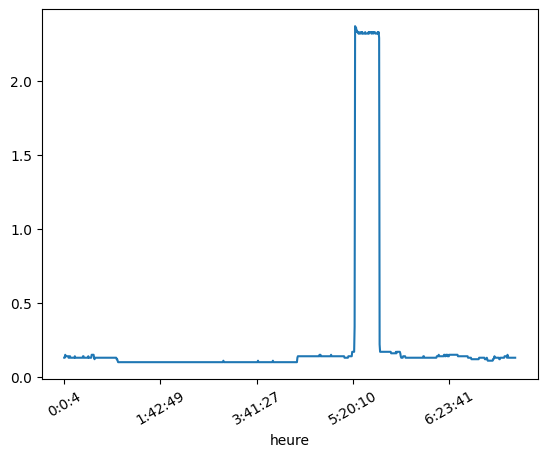

In [451]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [452]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:25:44.644512,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:26:06.502512,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:26:28.503512,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:26:50.431512,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:27:12.322512,21/08/23
...,...,...,...,...,...,...,...
1411581,27398,0.13,27.398,131.396452,33220766679,2024-09-09 07:24:49.389512,09/09/24
1411582,27644,0.13,27.644,130.227174,33220794323,2024-09-09 07:25:17.033512,09/09/24
1411583,27644,0.13,27.644,130.227174,33220821967,2024-09-09 07:25:44.677512,09/09/24
1411584,27649,0.13,27.649,130.203624,33220849616,2024-09-09 07:26:12.326512,09/09/24


In [453]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:4,27195,0.13,27.195,132.377275,33194082255,2024-09-09 00:00:04.965512,09/09/24
0:0:31,26819,0.13,26.819,134.233193,33194109074,2024-09-09 00:00:31.784512,09/09/24
0:0:56,24535,0.15,24.535,146.729162,33194133609,2024-09-09 00:00:56.319512,09/09/24
0:1:22,25714,0.14,25.714,140.001556,33194159323,2024-09-09 00:01:22.033512,09/09/24
0:1:48,26281,0.14,26.281,136.981089,33194185604,2024-09-09 00:01:48.314512,09/09/24
...,...,...,...,...,...,...,...
7:24:49,27398,0.13,27.398,131.396452,33220766679,2024-09-09 07:24:49.389512,09/09/24
7:25:17,27644,0.13,27.644,130.227174,33220794323,2024-09-09 07:25:17.033512,09/09/24
7:25:44,27644,0.13,27.644,130.227174,33220821967,2024-09-09 07:25:44.677512,09/09/24


In [454]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 12/08/24 4.383
Min : 08/09/24 3.2


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1410647,27195,0.13,27.195,132.377275,33194082255,2024-09-09 00:00:04.965512,09/09/24,0:0:4
1410648,26819,0.13,26.819,134.233193,33194109074,2024-09-09 00:00:31.784512,09/09/24,0:0:31
1410649,24535,0.15,24.535,146.729162,33194133609,2024-09-09 00:00:56.319512,09/09/24,0:0:56
1410650,25714,0.14,25.714,140.001556,33194159323,2024-09-09 00:01:22.033512,09/09/24,0:1:22
1410651,26281,0.14,26.281,136.981089,33194185604,2024-09-09 00:01:48.314512,09/09/24,0:1:48
...,...,...,...,...,...,...,...,...
1411581,27398,0.13,27.398,131.396452,33220766679,2024-09-09 07:24:49.389512,09/09/24,7:24:49
1411582,27644,0.13,27.644,130.227174,33220794323,2024-09-09 07:25:17.033512,09/09/24,7:25:17
1411583,27644,0.13,27.644,130.227174,33220821967,2024-09-09 07:25:44.677512,09/09/24,7:25:44
1411584,27649,0.13,27.649,130.203624,33220849616,2024-09-09 07:26:12.326512,09/09/24,7:26:12


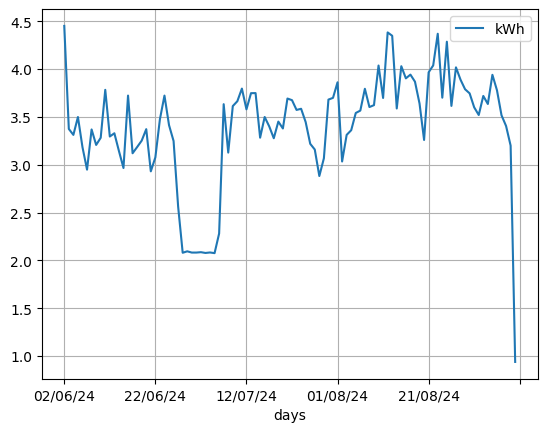

In [455]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-09-09 00:00:04.965512	2024-09-09 07:26:39.763512	7h 26m 34s 	939
<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 1410647 to 1411585
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   939 non-null    int64         
 1   kWh        939 non-null    float64       
 2   sec        939 non-null    float64       
 3   Wh         939 non-null    float64       
 4   cumul(ms)  939 non-null    int64         
 5   dates      939 non-null    datetime64[ns]
 6   days       939 non-null    object        
 7   heure      939 non-null    object        
 8   hours      939 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 73.4+ KB


('09/09/24', <Axes: xlabel='hours'>)

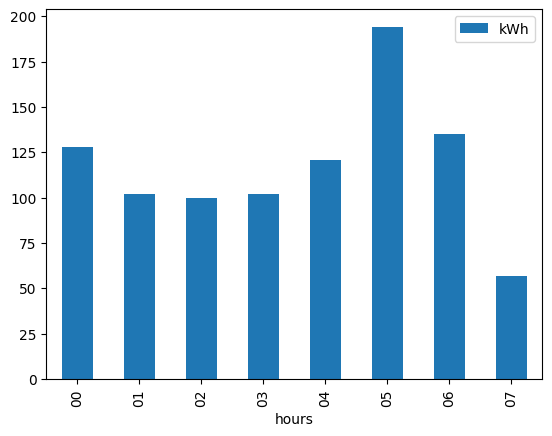

In [456]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [457]:
df_grp

,kWh
days,
21/08/23,0.796
22/08/23,3.700
23/08/23,4.218
24/08/23,3.687
25/08/23,4.177
...,...
05/09/24,3.779
06/09/24,3.517
07/09/24,3.405


In [458]:
# select number of days to display
span = 30
#df_grp.tail(span)


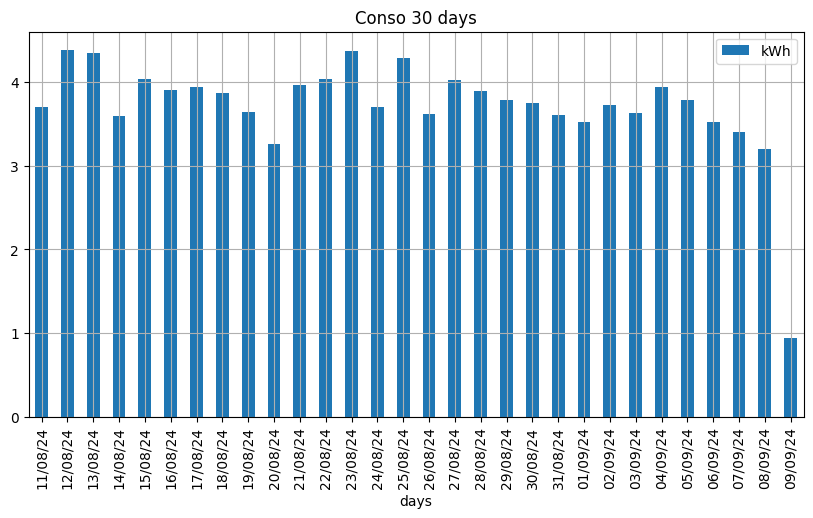

In [459]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


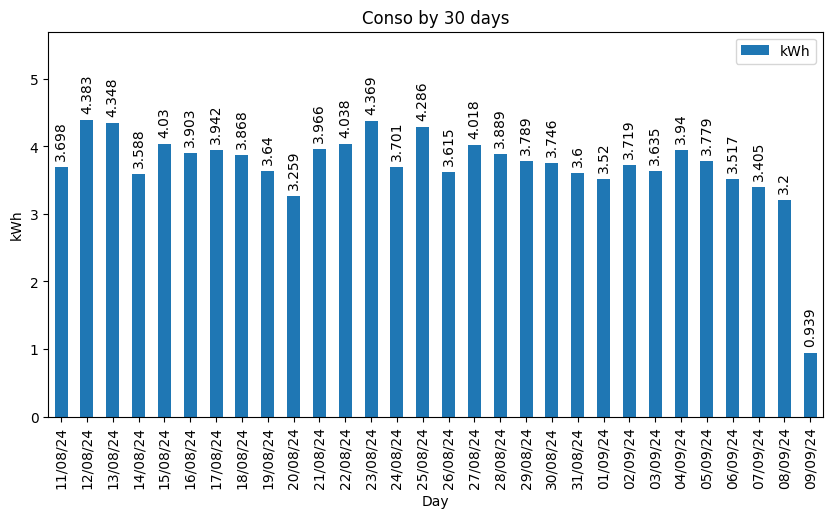

In [460]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [461]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
11/08/24    3.698
12/08/24    4.383
13/08/24    4.348
14/08/24    3.588
15/08/24    4.030
16/08/24    3.903
17/08/24    3.942
18/08/24    3.868
19/08/24    3.640
20/08/24    3.259
21/08/24    3.966
22/08/24    4.038
23/08/24    4.369
24/08/24    3.701
25/08/24    4.286
26/08/24    3.615
27/08/24    4.018
28/08/24    3.889
29/08/24    3.789
30/08/24    3.746
31/08/24    3.600
01/09/24    3.520
02/09/24    3.719
03/09/24    3.635
04/09/24    3.940
05/09/24    3.779
06/09/24    3.517
07/09/24    3.405
08/09/24    3.200
09/09/24    0.939
Name: kWh, dtype: float64

In [462]:
x_labels=df_grp.tail(span).index
x_labels

Index(['11/08/24', '12/08/24', '13/08/24', '14/08/24', '15/08/24', '16/08/24',
       '17/08/24', '18/08/24', '19/08/24', '20/08/24', '21/08/24', '22/08/24',
       '23/08/24', '24/08/24', '25/08/24', '26/08/24', '27/08/24', '28/08/24',
       '29/08/24', '30/08/24', '31/08/24', '01/09/24', '02/09/24', '03/09/24',
       '04/09/24', '05/09/24', '06/09/24', '07/09/24', '08/09/24', '09/09/24'],
      dtype='object', name='days')

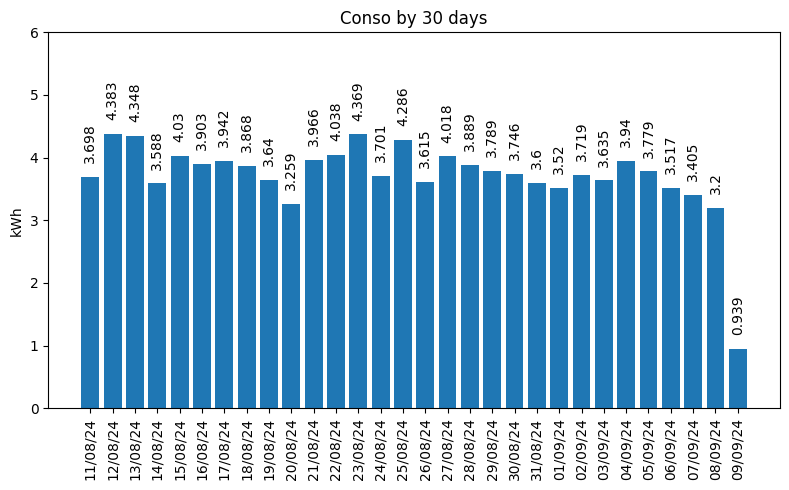

In [463]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [464]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

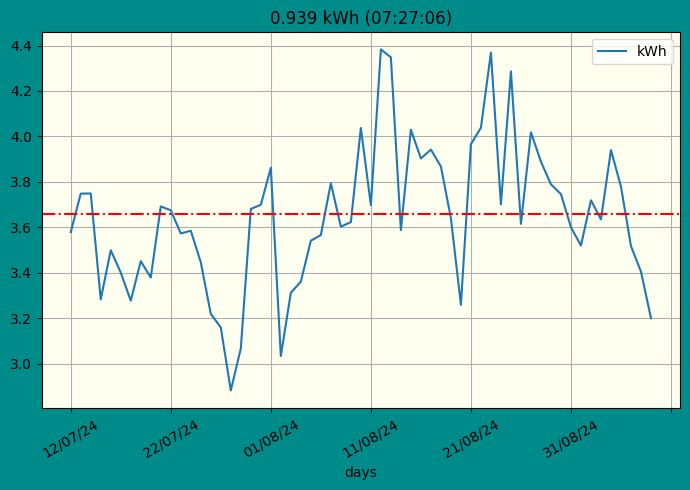

In [465]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

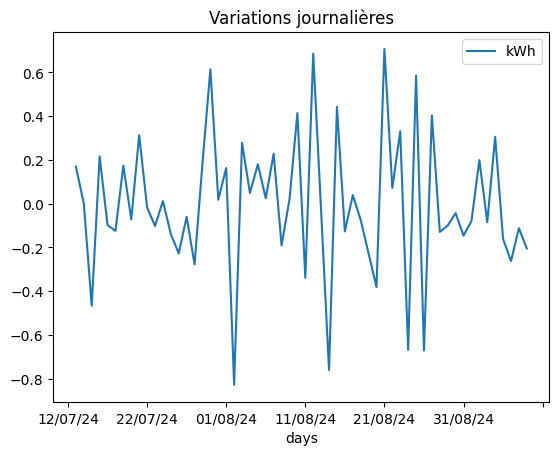

In [466]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [467]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:25:44.644512,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:26:06.502512,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:26:28.503512,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:26:50.431512,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:27:12.322512,21/08/23,19
...,...,...,...,...,...,...,...,...
1411581,27398,0.13,27.398,131.396452,33220766679,2024-09-09 07:24:49.389512,09/09/24,07
1411582,27644,0.13,27.644,130.227174,33220794323,2024-09-09 07:25:17.033512,09/09/24,07
1411583,27644,0.13,27.644,130.227174,33220821967,2024-09-09 07:25:44.677512,09/09/24,07
1411584,27649,0.13,27.649,130.203624,33220849616,2024-09-09 07:26:12.326512,09/09/24,07


In [468]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [469]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [470]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [471]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [472]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,796
22/08/23,3700
23/08/23,4218
24/08/23,3687
25/08/23,4177
...,...
05/09/24,3779
06/09/24,3517
07/09/24,3405


In [473]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:25:44.644512,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:26:06.502512,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:26:28.503512,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:26:50.431512,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:27:12.322512,21/08/23,19
...,...,...,...,...,...,...,...,...
1411581,27398,0.13,27.398,131.396452,33220766679,2024-09-09 07:24:49.389512,09/09/24,07
1411582,27644,0.13,27.644,130.227174,33220794323,2024-09-09 07:25:17.033512,09/09/24,07
1411583,27644,0.13,27.644,130.227174,33220821967,2024-09-09 07:25:44.677512,09/09/24,07
1411584,27649,0.13,27.649,130.203624,33220849616,2024-09-09 07:26:12.326512,09/09/24,07


In [474]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 19    0        21/08/23    19  0.16
               1        21/08/23    19  0.16
               2        21/08/23    19  0.16
               3        21/08/23    19  0.16
               4        21/08/23    19  0.16
...                          ...   ...   ...
09/09/24 07    1411581  09/09/24    07  0.13
               1411582  09/09/24    07  0.13
               1411583  09/09/24    07  0.13
               1411584  09/09/24    07  0.13
               1411585  09/09/24    07  0.13

[1411586 rows x 3 columns]

In [475]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [476]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/2

In [477]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,796,796
22/08/23,3700,3700
23/08/23,4218,4218
24/08/23,3687,3687
25/08/23,4177,4177
...,...,...
05/09/24,3779,3779
06/09/24,3517,3517
07/09/24,3405,3405


In [478]:
grp_by_day['kWh'].cumsum()

days
21/08/23        796
22/08/23       4496
23/08/23       8714
24/08/23      12401
25/08/23      16578
             ...   
05/09/24    1400525
06/09/24    1404042
07/09/24    1407447
08/09/24    1410647
09/09/24    1411586
Name: kWh, Length: 386, dtype: int64

In [479]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 19     108
         20     281
         21     147
         22     130
         23     130
...             ...
09/09/24 03     102
         04     121
         05     194
         06     135
         07      57

[9229 rows x 1 columns]

In [480]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  19           108
          20           389
          21           536
          22           666
          23           796
                    ...   
09/09/24  03       1411079
          04       1411200
          05       1411394
          06       1411529
          07       1411586
Name: kWh, Length: 9229, dtype: int64

In [481]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 19     108     108    NaN
         20     281     389  173.0
         21     147     536 -134.0
         22     130     666  -17.0
         23     130     796    0.0
...             ...     ...    ...
09/09/24 03     102     432    2.0
         04     121     553   19.0
         05     194     747   73.0
         06     135     882  -59.0
         07      57     939  -78.0

[9229 rows x 3 columns]

In [482]:
today, grp_by_dayhours.loc[today]

('09/09/24',
        kWh  cumsum  diff
 hours                   
 00     128     128   NaN
 01     102     230 -26.0
 02     100     330  -2.0
 03     102     432   2.0
 04     121     553  19.0
 05     194     747  73.0
 06     135     882 -59.0
 07      57     939 -78.0)

Text(0.5, 1.0, 'Cumul journalier')

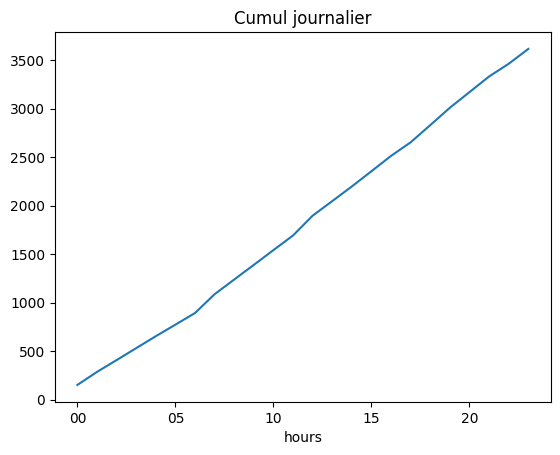

In [483]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

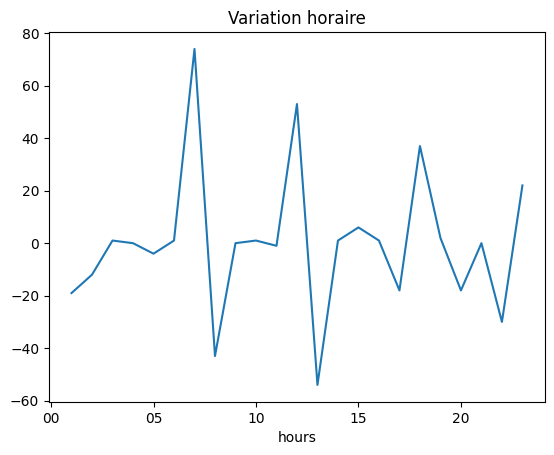

In [484]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [485]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

386

Text(0.5, 1.0, '386 days')

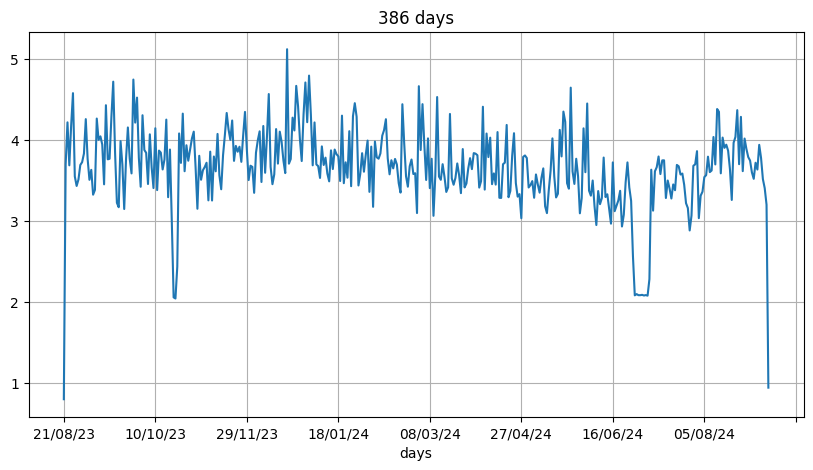

In [486]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [487]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,128,128,NaN
01,102,230,-26.0
02,100,330,-2.0
03,102,432,2.0
04,121,553,19.0
05,194,747,73.0
06,135,882,-59.0
07,57,939,-78.0


In [488]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


8

In [489]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 9)

In [490]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [491]:
grp_by_dayhours.loc[day,'days'].values

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [492]:
grp_by_dayhours.loc[day,'days']

hours
00    1.0
01    2.0
02    3.0
03    4.0
04    5.0
05    6.0
06    7.0
07    8.0
Name: days, dtype: float64

In [493]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [494]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 00 to 07
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     8 non-null      int64  
 1   cumsum  8 non-null      int64  
 2   diff    7 non-null      float64
 3   days    8 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 320.0+ bytes


In [495]:
grp_by_dayhours.loc[day,'days']

hours
00    1.0
01    2.0
02    3.0
03    4.0
04    5.0
05    6.0
06    7.0
07    8.0
Name: days, dtype: float64

In [496]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,128,128,NaN,1.0
01,102,230,-26.0,2.0
02,100,330,-2.0,3.0
03,102,432,2.0,4.0
04,121,553,19.0,5.0
05,194,747,73.0,6.0
06,135,882,-59.0,7.0
07,57,939,-78.0,8.0


Text(0.5, 1.0, '09/09/24')

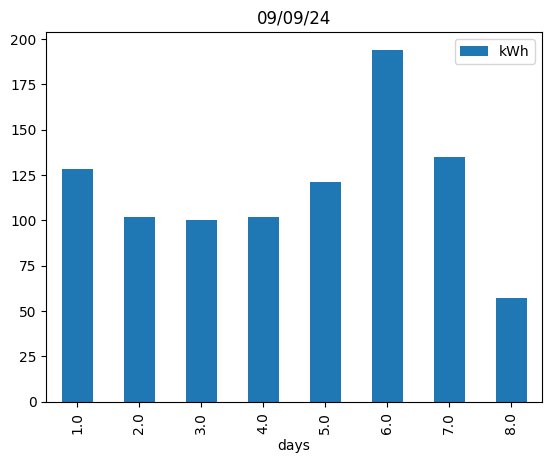

In [497]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [498]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07'], dtype='object', name='hours')

# Conso du jour


In [499]:
groupedbyhour.count()

,kWh
hours,
00,128
01,102
02,100
03,102
04,121
05,194
06,135
07,57


In [500]:
day = '26/08/24'
day = today
grp_by_dayhours.loc[day].kWh

hours
00    128
01    102
02    100
03    102
04    121
05    194
06    135
07     57
Name: kWh, dtype: int64

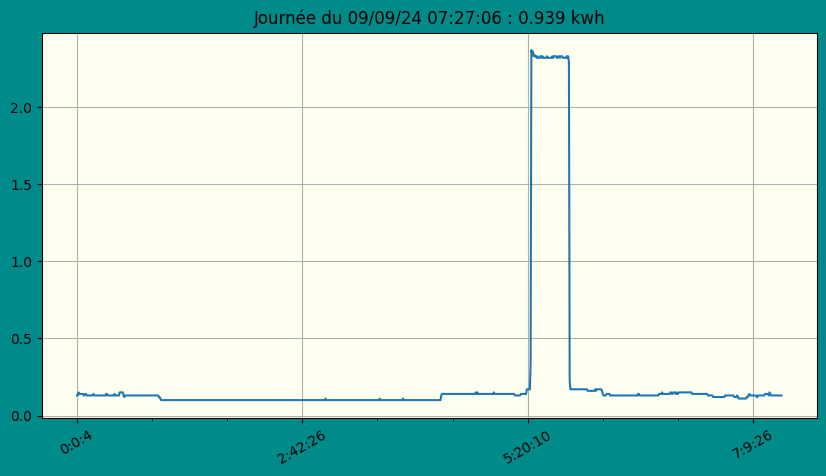

In [501]:

show(day,bgcolor='ivory')


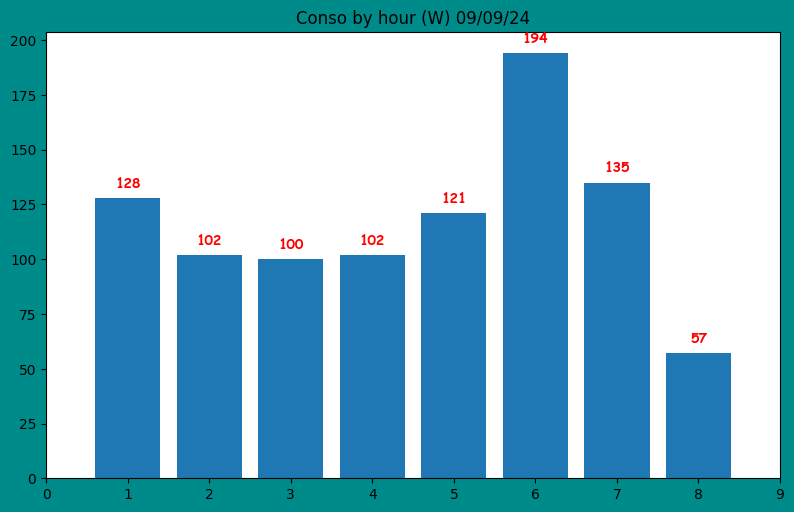

In [502]:
# conso by hour
#data = groupedbyhour.count().kWh
data = grp_by_dayhours.loc[day].kWh

# len(groupedbyhour)
x = np.arange(1,len(data)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
#plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {today}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [503]:
diff = grp_by_dayhours.loc[day]
diff


,kWh,cumsum,diff,days
hours,,,,
00,128,128,NaN,1.0
01,102,230,-26.0,2.0
02,100,330,-2.0,3.0
03,102,432,2.0,4.0
04,121,553,19.0,5.0
05,194,747,73.0,6.0
06,135,882,-59.0,7.0
07,57,939,-78.0,8.0


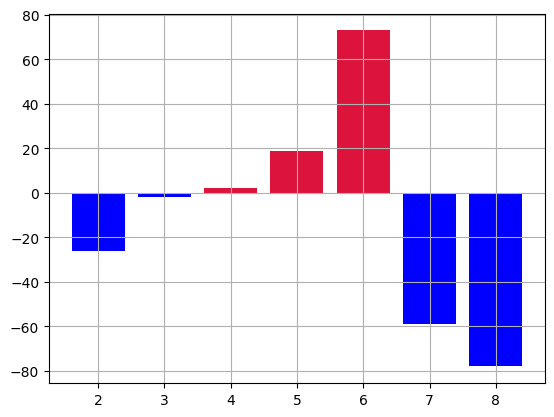

In [504]:
xx = np.arange(1,len(diff)+1)
plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

<Axes: xlabel='hours'>

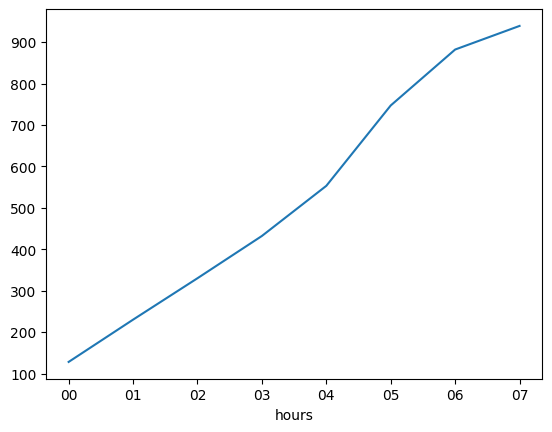

In [505]:
data.cumsum().plot()


<Axes: xlabel='hours'>

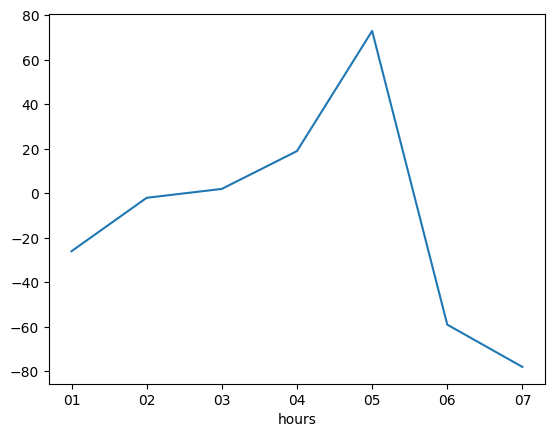

In [506]:
data.diff().plot()

# Test

In [507]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [508]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [509]:
#conso_byhour(day)

In [510]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

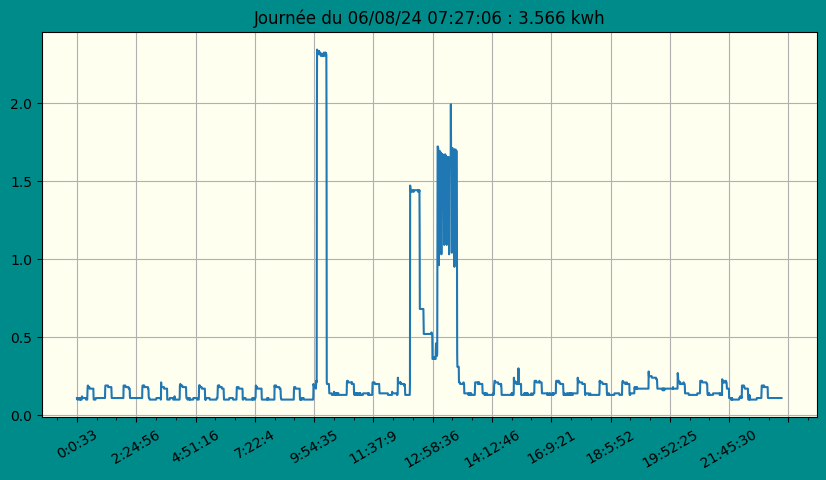

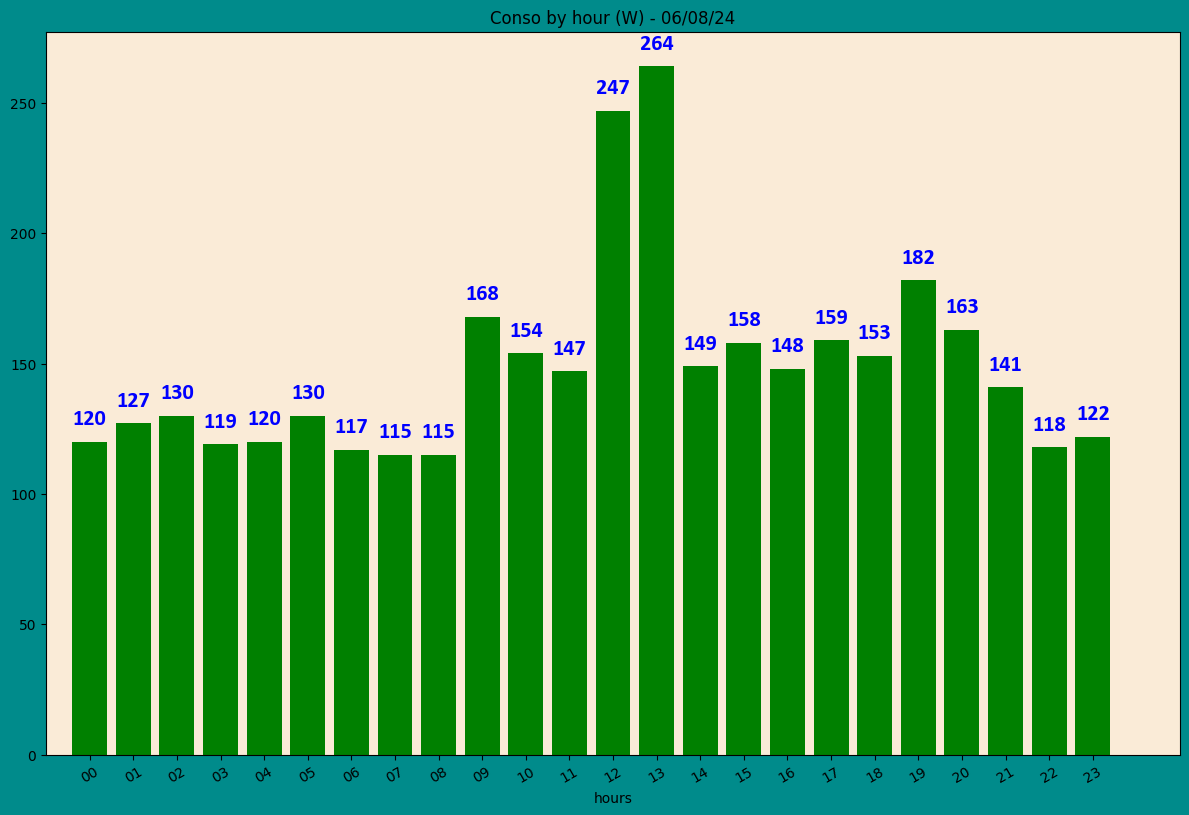

In [511]:
# plot any day
day = '06/08/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

<Axes: xlabel='days'>

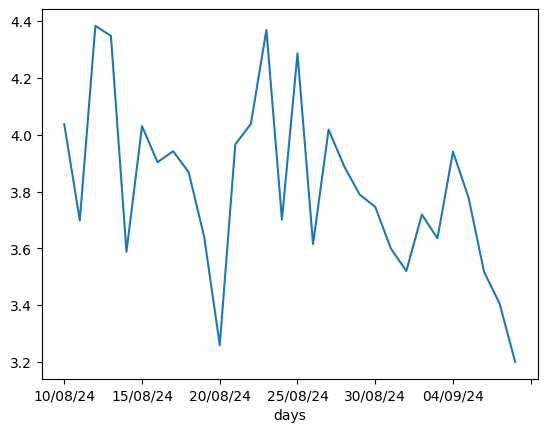

In [512]:
month.plot()


In [513]:
month

days
10/08/24    4.037
11/08/24    3.698
12/08/24    4.383
13/08/24    4.348
14/08/24    3.588
15/08/24    4.030
16/08/24    3.903
17/08/24    3.942
18/08/24    3.868
19/08/24    3.640
20/08/24    3.259
21/08/24    3.966
22/08/24    4.038
23/08/24    4.369
24/08/24    3.701
25/08/24    4.286
26/08/24    3.615
27/08/24    4.018
28/08/24    3.889
29/08/24    3.789
30/08/24    3.746
31/08/24    3.600
01/09/24    3.520
02/09/24    3.719
03/09/24    3.635
04/09/24    3.940
05/09/24    3.779
06/09/24    3.517
07/09/24    3.405
08/09/24    3.200
Name: kWh, dtype: float64

In [514]:
month

days
10/08/24    4.037
11/08/24    3.698
12/08/24    4.383
13/08/24    4.348
14/08/24    3.588
15/08/24    4.030
16/08/24    3.903
17/08/24    3.942
18/08/24    3.868
19/08/24    3.640
20/08/24    3.259
21/08/24    3.966
22/08/24    4.038
23/08/24    4.369
24/08/24    3.701
25/08/24    4.286
26/08/24    3.615
27/08/24    4.018
28/08/24    3.889
29/08/24    3.789
30/08/24    3.746
31/08/24    3.600
01/09/24    3.520
02/09/24    3.719
03/09/24    3.635
04/09/24    3.940
05/09/24    3.779
06/09/24    3.517
07/09/24    3.405
08/09/24    3.200
Name: kWh, dtype: float64

In [515]:
# date with max conso in 1 month
month.idxmax()

'12/08/24'

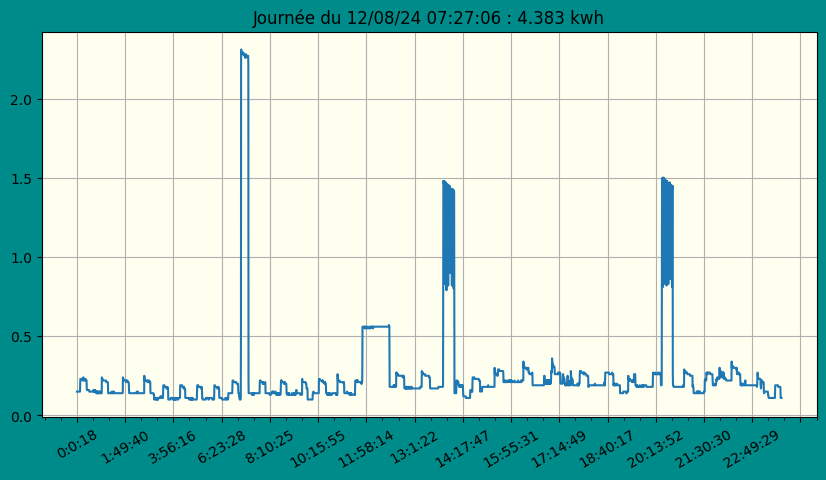

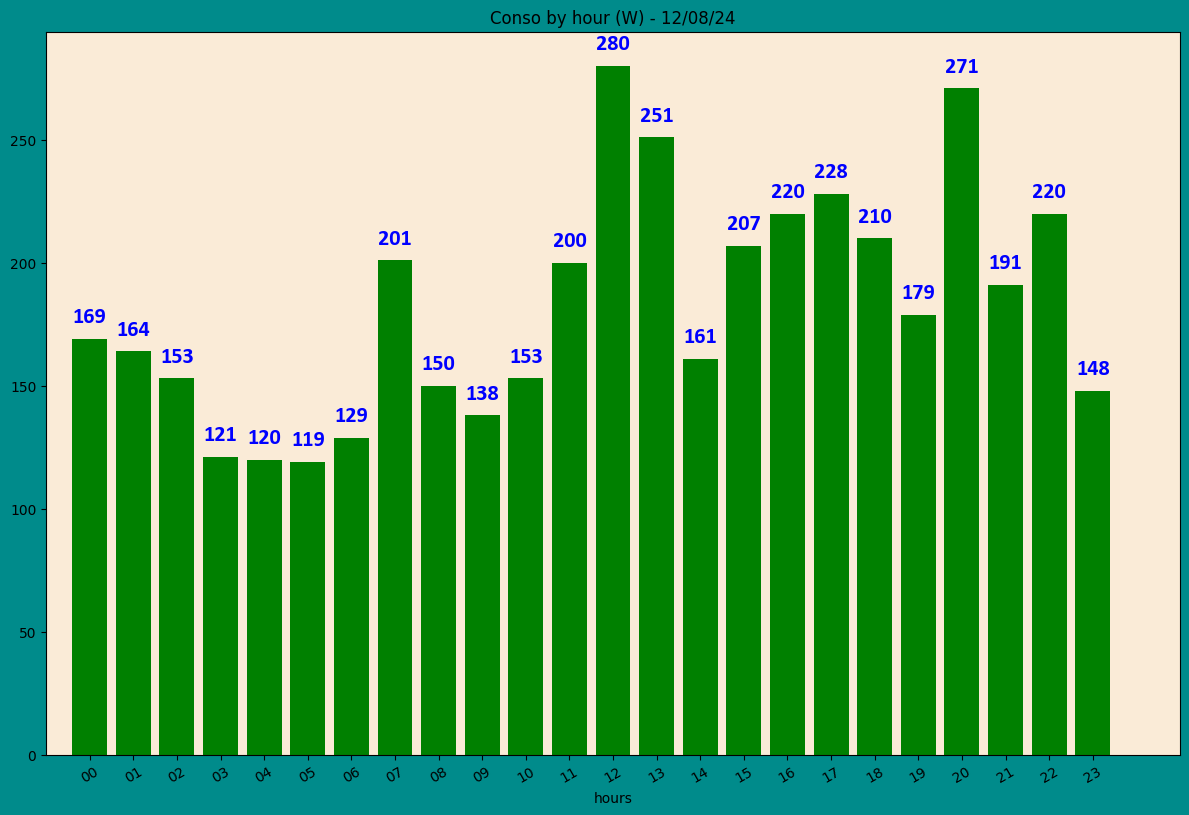

In [516]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [517]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,169,169,NaN,NaN
01,164,333,-5.0,NaN
02,153,486,-11.0,NaN
03,121,607,-32.0,NaN
04,120,727,-1.0,NaN
05,119,846,-1.0,NaN
06,129,975,10.0,NaN
07,201,1176,72.0,NaN
08,150,1326,-51.0,NaN


In [518]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

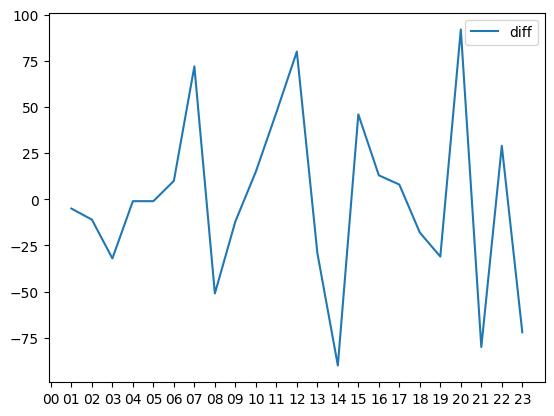

In [519]:
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

In [520]:
# 41 s
# file to big to git sync

# create .gitignore
filename='conso_data.csv'
#conso_data.to_csv(filename)